Natural Language Processing with Python – Analyzing Text with the Natural Language Toolkit Steven Bird, mEwan Klein, and Edward Loper http://www.nltk.org/book/

# Chapter 05 - Categorizing and Tagging Words

##  5.1 Using a Tagger

A part-of-speech tagger, or POS tagger, processes a sequence of words, and attaches a part of speech tag to each word.

In [1]:
import nltk

In [2]:
text = nltk.word_tokenize("And now for something completely different")

In [3]:
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [6]:
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")

In [7]:
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [ ]:
# small test:
# Many words, like ski and race, can be used as nouns or verbs with no difference in pronunciation. Can you think of others?
# Hint: think of a commonplace object and try to put the word to before it to see if it can also be a verb, or think of an action and try to put the
# before it to see if it can also be a noun. Now make up a sentence with both uses of this word, and run the POS tagger on this sentence.

In [8]:
text = nltk.word_tokenize('These figures suggest that the use of children in combat is increasing.')
nltk.pos_tag(text)

[('These', 'DT'),
 ('figures', 'NNS'),
 ('suggest', 'VBP'),
 ('that', 'IN'),
 ('the', 'DT'),
 ('use', 'NN'),
 ('of', 'IN'),
 ('children', 'NNS'),
 ('in', 'IN'),
 ('combat', 'NN'),
 ('is', 'VBZ'),
 ('increasing', 'VBG'),
 ('.', '.')]

In [9]:
text = nltk.word_tokenize('Such markers were readily available and easy to use.')
nltk.pos_tag(text)

[('Such', 'JJ'),
 ('markers', 'NNS'),
 ('were', 'VBD'),
 ('readily', 'RB'),
 ('available', 'JJ'),
 ('and', 'CC'),
 ('easy', 'JJ'),
 ('to', 'TO'),
 ('use', 'VB'),
 ('.', '.')]

In [10]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())

In [11]:
text.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


In [12]:
text.similar('bought')

made said done put had seen found given left heard was been brought
set got that took in told felt


In [13]:
text.similar('over')

in on to of and for with from at by that into as up out down through
is all about


In [14]:
text.similar('the')

a his this their its her an that our any all one these my in your no
some other and


## 5.2 Tagged Corpora

### Representing Tagged Tokens

By convention in NLTK, a tagged token is represented using a tuple consisting of the
token and the tag. We can create one of these special tuples from the standard string
representation of a tagged token, using the function str2tuple():

In [15]:
import nltk

In [16]:
tagged_token = nltk.tag.str2tuple('fly/NN')

In [17]:
tagged_token

('fly', 'NN')

In [18]:
tagged_token[0]

'fly'

In [19]:
tagged_token[1]

'NN'

In [20]:
sent = '''
    The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
    other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
    Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
    said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
    accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
    interest/NN of/IN both/ABX governments/NNS ''/'' ./.
    '''

In [21]:
[nltk.tag.str2tuple(t) for t in sent.split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

### Reading Tagged Corpora

Several of the corpora included with NLTK have been tagged for their part-of-speech. Here’s an example of what you might see if you opened a file from the Brown Corpus with a text editor:

    The/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at investigation/
    nn of/in Atlanta’s/np...
Other corpora use a variety of formats for storing part-of-speech tags. NLTK’s corpus readers provide a uniform interface so that you don’t have to be concerned with the different file formats. In contrast with the file extract just shown, the corpus reader for
the Brown Corpus represents the data as shown next.    

In [22]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [23]:
print(nltk.corpus.nps_chat.tagged_words())

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]


In [24]:
nltk.corpus.conll2000.tagged_words()

[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]

In [25]:
nltk.corpus.treebank.tagged_words()

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

In [39]:
nltk.corpus.sinica_treebank.tagged_words()

[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]

In [40]:
nltk.corpus.indian.tagged_words()

[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]

In [41]:
nltk.corpus.mac_morpho.tagged_words()

[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ...]

In [42]:
nltk.corpus.conll2002.tagged_words()

[('Sao', 'NC'), ('Paulo', 'VMI'), ('(', 'Fpa'), ...]

In [43]:
nltk.corpus.cess_cat.tagged_words()

[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ...]

### A Simplified Part-of-Speech Tagset

In [49]:
%matplotlib inline

In [2]:
# Let’s see which of these tags are the most common in the news category of the Brown Corpus:
from nltk.corpus import brown

brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [51]:
# small test: 
# Plot the frequency distribution just shown using tag_fd.plot(cumulative=True). 
# What percentage of words are tagged using the first five tags of the above list?

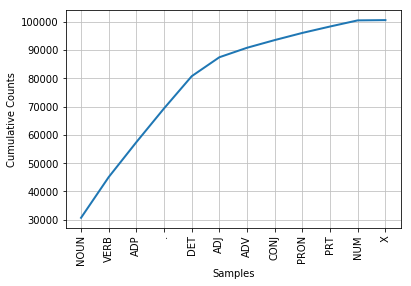

In [55]:
tag_fd.plot(cumulative=True)

In [59]:
sum(freq for pos, freq in tag_fd.most_common(5)) / tag_fd.N()

0.80280247429242

### Nouns

The simplified noun tags are N for common nouns like book, and NP for proper nouns
like Scotland.
Let’s inspect some tagged text to see what parts-of-speech occur before a noun, with
the most frequent ones first. To begin with, we construct a list of bigrams whose members are themselves word-tag pairs, such as (('The', 'DET'), ('Fulton', 'NP')) and
(('Fulton', 'NP'), ('County', 'N')). Then we construct a FreqDist from the tag parts
of the bigrams.

In [70]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag, _) in fdist.most_common()]

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

### Verbs

What are the most common verbs in news text? Let’s sort all the verbs by frequency:

In [71]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
[wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB']

['is',
 'said',
 'was',
 'are',
 'be',
 'has',
 'have',
 'will',
 'says',
 'would',
 'were',
 'had',
 'been',
 'could',
 "'s",
 'can',
 'do',
 'say',
 'make',
 'may',
 'did',
 'rose',
 'made',
 'does',
 'expected',
 'buy',
 'take',
 'get',
 'might',
 'sell',
 'added',
 'sold',
 'help',
 'including',
 'should',
 'reported',
 'according',
 'pay',
 'compared',
 'being',
 'fell',
 'began',
 'based',
 'used',
 'closed',
 "'re",
 'want',
 'see',
 'took',
 'yield',
 'offered',
 'set',
 'priced',
 'approved',
 'come',
 'noted',
 'cut',
 'ended',
 'found',
 'increased',
 'become',
 'think',
 'named',
 'go',
 'trying',
 'proposed',
 'received',
 'growing',
 'declined',
 'held',
 'give',
 'came',
 'use',
 'put',
 'making',
 'continue',
 'raise',
 'estimated',
 'called',
 'paid',
 'designed',
 'going',
 'expects',
 'seeking',
 'must',
 'plans',
 'wo',
 'increasing',
 'saying',
 'got',
 'owns',
 'trading',
 'acquired',
 'gained',
 'fined',
 'reached',
 'holding',
 'announced',
 'filed',
 'became',


In [72]:
cfd1 = nltk.ConditionalFreqDist(wsj)

In [73]:
cfd1['yield'].most_common()

[('VERB', 28), ('NOUN', 20)]

In [74]:
cfd1['cut'].most_common()

[('VERB', 25), ('NOUN', 3)]

In [89]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
list(cfd2['VBN'])

['named',
 'used',
 'caused',
 'exposed',
 'reported',
 'replaced',
 'sold',
 'died',
 'expected',
 'diagnosed',
 'studied',
 'industrialized',
 'owned',
 'found',
 'classified',
 'rejected',
 'outlawed',
 'imported',
 'tracked',
 'thought',
 'considered',
 'elected',
 'based',
 'lifted',
 'ensnarled',
 'voted',
 'been',
 'held',
 'banned',
 'renovated',
 'prolonged',
 'recorded',
 'accumulated',
 'offered',
 'become',
 'guaranteed',
 'proposed',
 'related',
 'improved',
 'worried',
 'cluttered',
 'expedited',
 'retired',
 'ordered',
 'collected',
 'required',
 'received',
 'moved',
 'determined',
 'made',
 'changed',
 'completed',
 'disputed',
 'refunded',
 'estimated',
 'compared',
 'located',
 'filed',
 'scrapped',
 'anticipated',
 'priced',
 'set',
 'applied',
 'existed',
 'incurred',
 'reached',
 'Regarded',
 'paid',
 'trained',
 'instituted',
 'vowed',
 'deemed',
 'combined',
 'removed',
 'concerned',
 'complained',
 'accelerated',
 'believed',
 'called',
 'solved',
 'forgiven',


In [90]:
cfd1 = nltk.ConditionalFreqDist(wsj)

In [91]:
[w for w in cfd1.conditions() if 'VBD' in cfd1[w] and 'VBN' in cfd1[w]]

['named',
 'used',
 'caused',
 'reported',
 'said',
 'stopped',
 'heard',
 'studied',
 'led',
 'replaced',
 'sold',
 'worked',
 'died',
 'found',
 'rejected',
 'imposed',
 'made',
 'dumped',
 'imported',
 'mixed',
 'described',
 'continued',
 'ended',
 'thought',
 'reached',
 'had',
 'approved',
 'completed',
 'suspended',
 'lifted',
 'dropped',
 'voted',
 'settled',
 'decided',
 'followed',
 'welcomed',
 'held',
 'banned',
 'pointed',
 'squeezed',
 'fed',
 'registered',
 'released',
 'increased',
 'forecast',
 'recorded',
 'announced',
 'offered',
 'lowered',
 'spent',
 'proposed',
 'got',
 'added',
 'noted',
 'turned',
 'closed',
 'retired',
 'ordered',
 'required',
 'received',
 'moved',
 'determined',
 'changed',
 'upheld',
 'set',
 'estimated',
 'compared',
 'opened',
 'tied',
 'filed',
 'disclosed',
 'anticipated',
 'attached',
 'called',
 'applied',
 'favored',
 'posted',
 'paid',
 'removed',
 'accelerated',
 'placed',
 'vowed',
 'deemed',
 'prompted',
 'complained',
 'believed'

In [92]:
idx1 = wsj.index(('kicked', 'VBD'))
wsj[idx1-4:idx1+1]

[('While', 'IN'),
 ('program', 'NN'),
 ('trades', 'NNS'),
 ('swiftly', 'RB'),
 ('kicked', 'VBD')]

In [93]:
idx2 = wsj.index(('kicked', 'VBN'))
wsj[idx2-4:idx2+1]

[('head', 'NN'),
 ('of', 'IN'),
 ('state', 'NN'),
 ('has', 'VBZ'),
 ('kicked', 'VBN')]

In [ ]:
# small test: 
# Given the list of past participles specified by cfd2['VN'].keys(), try to collect a list of all the word-tag pairs 
# that immediately precede items in that list.

In [97]:
[(w1, t1) for (w1, t1), (w2, t2) in nltk.bigrams(wsj) if t2 == 'VBN']

[('was', 'VBD'),
 ('once', 'RB'),
 ('has', 'VBZ'),
 ('workers', 'NNS'),
 ('were', 'VBD'),
 ('was', 'VBD'),
 ('and', 'CC'),
 ('were', 'VBD'),
 ('have', 'VBP'),
 ('the', 'DT'),
 ('recently', 'RB'),
 ('*', '-NONE-'),
 ('workers', 'NNS'),
 ('Western', 'JJ'),
 ('is', 'VBZ'),
 (',', ','),
 ('few', 'JJ'),
 ('are', 'VBP'),
 ('easily', 'RB'),
 ('be', 'VB'),
 ('were', 'VBD'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('process', 'NN'),
 ('funds', 'NNS'),
 ('are', 'VBP'),
 ('are', 'VBP'),
 (',', ','),
 ('bills', 'NNS'),
 ('was', 'VBD'),
 (',', ','),
 ("n't", 'RB'),
 ('is', 'VBZ'),
 ('has', 'VBZ'),
 ("n't", 'RB'),
 ('was', 'VBD'),
 ('had', 'VBD'),
 ('was', 'VBD'),
 ('are', 'VBP'),
 ('the', 'DT'),
 ('of', 'IN'),
 ('has', 'VBZ'),
 ("'s", 'POS'),
 ('has', 'VBZ'),
 ('have', 'VBP'),
 ('recently', 'RB'),
 ('its', 'PRP$'),
 ('have', 'VBP'),
 ('has', 'VBZ'),
 (',', ','),
 ('had', 'VBD'),
 ('is', 'VBZ'),
 ('is', 'VBZ'),
 ('forecasts', 'NNS'),
 ('and', 'CC'),
 ('also', 'RB'),
 ('boosts', 'NNS'),
 ('less', 'RBR'),
 

### Adjectives and Adverbs

### Unsimplified Tags

In [98]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist(
        (tag, word) for (word, tag) in tagged_text
        if tag.startswith(tag_prefix)
    )
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

In [99]:
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))

In [100]:
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

### Exploring Tagged Corpora

In [101]:
brown_learned_text = brown.words(categories='learned')
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))

[',',
 '.',
 'accomplished',
 'analytically',
 'appear',
 'apt',
 'associated',
 'assuming',
 'became',
 'become',
 'been',
 'began',
 'call',
 'called',
 'carefully',
 'chose',
 'classified',
 'colorful',
 'composed',
 'contain',
 'differed',
 'difficult',
 'encountered',
 'enough',
 'equate',
 'extremely',
 'found',
 'happens',
 'have',
 'ignored',
 'in',
 'involved',
 'more',
 'needed',
 'nightly',
 'observed',
 'of',
 'on',
 'out',
 'quite',
 'represent',
 'responsible',
 'revamped',
 'seclude',
 'set',
 'shortened',
 'sing',
 'sounded',
 'stated',
 'still',
 'sung',
 'supported',
 'than',
 'to',
 'when',
 'work']

In [102]:
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [103]:
from nltk.corpus import brown


def process(sentence):
    for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3)

In [104]:
for tagged_sent in brown.tagged_sents():
    process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
got to go
raised to pay
scheduled to go
cut to meet
needed to meet
hastened to add
found to prevent
continue to insist
compelled to make
made to remove
revamped to give
want to risk
appear to spark
fails to consider
plans to call
going to examine
plans to name
come to pass
voted to accept
happens to hold
authorized to adopt
hesitated to prosecute
try to make
decided to spend
taken to preserve
left to preserve
stand to bring
decided to seek
trying to induce
proposing to make
decided to run
directed to investigate
expected to pass
expected to make
expected to encounter
hopes to pass
came to pay
expected to receive
understood to follow
wanted to vote
decide

needs to stand
strives to emulate
refusing to show
seems to match
decided to rake
entitled to stay
bringing to bear
beginning to get
threaten to use
begin to play
begin to hunt
induced to see
going to hang
continue to test
choose to agree
chosen to find
compelled to conduct
need to realize
used to justify
fail to respond
intends to economize
bound to say
trying to mollify
used to say
came to reassert
choose to call
intend to re-enter
conscripted to enact
continues to feed
tried to integrate
poised to strike
try to force
attempting to reach
afford to take
forbidden to sit
plans to import
likes to imagine
used to get
trying to make
ceased to suggest
going to work
wanting to cut
choose to persuade
trying to keep
like to embark
suited to defeat
hastened to put
like to add
want to preserve
required to participate
happened to save
doing to promote
tempted to quote
continuing to capture
need to communicate
like to see
interested to know
allowed to rust
chose to devote
left to choose
want to o

wanted to polish
pays to consider
compelled to use
began to fall
begun to write
made to seem
attempting to direct
pleased to call
scheduled to nominate
come to spend
managed to irrigate
stooped to scoop
fall to show
try to push
begins to deteriorate
used to like
offered to ship
hopes to find
invented to hold
learn to like
labored to set
set to receive
entered to compete
seem to make
seemed to answer
decided to use
began to show
Wishing to show
learned to set
forced to fly
hope to break
came to recognize
turning to cup
seems to creep
going to live
got to learn
learn to live
going to live
like to sew
love to run
love to crack
yearn to make
tried to see
love to dust
like to become
decide to write
cause to exist
learn to portray
learn to portray
began to advise
taught to yield
prefer to cope
helps to explain
surprised to bump
seemed to brave
begins to regard
began to embezzle
appears to endorse
expected to like
begin to assert
began to challenge
going to become
helping to make
began to str

try to get
attempted to restrain
wished to continue
failed to flourish
propose to go
wished to segregate
liked to fancy
Deciding to become
strove to see
used to play
returned to live
proceeded to find
likes to catch
seems to care
intends to save
compelled to find
wishes to continue
ceasing to write
stops to ask
expected to fulfill
tailored to meet
want to say
want to quote
seems to realize
primed to catch
try to diagnose
want to point
used to regard
seems to represent
trying to draw
wish to see
used to include
allowed to operate
urged to produce
afford to present
decides to drop
expect to abolish
needed to pit
tempted to blame
hope to serve
tried to remedy
tends to express
seem to believe
permitted to return
attempted to make
prepared to demonstrate
calculated to suggest
seemed to disconcert
known to make
going to talk
learns to focus
chooses to subordinate
wish to preserve
cease to exist
seem to constitute
destined to fail
wants to get
began to understand
wanted to capture
liked to te

found to exist
taken to isolate
modified to reduce
tending to separate
established to gather
used to study
used to measure
used to calculate
directed to mail
offers to pay
promises to pay
construed to limit
directed to pay
directed to cover
failed to offer
intends to pursue
helping to create
wish to merge
pleased to note
continue to serve
pleased to note
inclined to drag
trying to get
made to enlist
try to run
designed to help
designed to reflect
designed to avoid
designed to reflect
required to help
working to develop
installed to increase
prepared to stay
used to keep
came to receive
tend to create
attempting to bring
designed to arrest
attempt to monopolize
held to appoint
prepared to submit
allowed to petition
ordered to terminate
required to pass
required to pass
permitted to endanger
compelled to testify
permitted to rebut
failed to show
permitted to rebut
refused to require
ordered to report
ordered to report
fail to see
sought to secure
failed to show
entitled to inspect
hopes 

designed to cover
found to vary
taken to rest
needs to know
attempts to stand
wishing to know
made to appear
attempts to supply
like to record
claims to show
mean to assert
mean to assert
prepared to say
mean to say
sought to express
said to learn
mean to say
meant to say
meant to say
meant to express
forced to go
disposed to quarrel
seem to present
allowed to move
tended to reflect
beginning to appreciate
begun to disturb
venture to assign
crystallized to find
begin to show
beginning to expand
dared to give
continued to employ
began to creep
seems to appear
rode to arrest
serve to quiet
decided to ride
prepared to fight
allowed to see
refused to give
compelled to kill
desiring to leave
wanted to clean
needed to hire
continued to spring
extended to include
intending to use
need to commit
sought to place
want to know
want to know
serve to contrast
obligated to regard
tried to make
attempting to falsify
continued to accuse
continued to accuse
dare to instigate
acting to deliver
seeking t

going to kill
like to tell
want to see
get to come
like to dance
like to dance
wanted to believe
trying to put
started to say
Forgot to get
started to say
trying to make
want to sit
trying to get
want to lease
wanted to shadow
trying to make
tried to shadow
going to join
try to keep
like to run
wanted to case
going to join
wanted to hang
go to pick
began to back
paused to feel
decided to risk
turned to face
began to feel
started to sweep
startled to find
meant to convey
going to leave
returning to seek
bother to look
try to run
going to make
began to wave
gone to get
Want to try
going to call
want to find
want to see
designed to put
turned to see
forced to use
trying to drag
start to angle
tried to flatten
managed to hunch
brought to make
surprised to find
started to back
want to try
trying to catch
used to keep
forget to turn
promised to observe
started to plod
tried to turn
beginning to feel
decided to indulge
forgotten to turn
meant to shut
want to leave
want to go
got to remember
g

expected to risk
decided to set
seem to locate
allowed to come
allowed to leave
sent to clean
proceeded to disturb
came to teach
wait to get
get to school
beginning to stir
got to get
seemed to think
trying to get
struggling to get
mean to pull
got to take
trying to think
seeming to scream
sought to make
proceeded to give
advised to flee
like to hurt
hurt to beat
want to go
chanced to glance
vowed to take
started to move
began to sizzle
cared to see
time to pay
determined to hold
beginning to fold
wanted to smoke
seem to get
trying to find
like to keep
seem to snap
like to think
beginning to find
beginning to look
going to last
going to prove
hoped to die
gone to live
stayed to get
turned to go
going to see
going to laugh
tried to bite
seem to rise
come to see
got to know
seem to take
beginning to creep
seemed to rain
like to hear
come to make
started to move
bent to pick
permitted to operate
beginning to get
seemed to think
tried to make
wanted to present
expected to stay
wish to star

In [105]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist(
    (word.lower(), tag)
    for (word, tag) in brown_news_tagged
)

for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))

best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


## 5.3 Mapping Words to Properties Using Python Dictionaries

### Indexing Lists Versus Dictionaries

### Dictionaries in Python

Python provides a dictionary data type that can be used for mapping between arbitrary
types. It is like a conventional dictionary, in that it gives you an efficient way to look things up.
To illustrate, we define pos to be an empty dictionary and then add four entries to it, specifying the part-of-speech of some words. We add entries to a dictionary using the familiar square bracket notation:

In [4]:
pos = {}

In [5]:
pos

{}

In [6]:
pos['colorless'] = 'ADJ'

In [7]:
pos

{'colorless': 'ADJ'}

In [8]:
pos['ideas'] = 'N'

In [9]:
pos['sleep'] = 'V'

In [10]:
pos['furiously'] = 'ADV'

In [11]:
pos

{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

In [12]:
pos['ideas']

'N'

In [13]:
pos['colorless']

'ADJ'

In [14]:
pos['green']

KeyError: 'green'

In [15]:
list(pos)

['colorless', 'ideas', 'sleep', 'furiously']

In [16]:
sorted(pos)

['colorless', 'furiously', 'ideas', 'sleep']

In [17]:
[w for w in pos if w.endswith('s')]

['colorless', 'ideas']

In [18]:
for word in sorted(pos):
    print(word + ":", pos[word])

colorless: ADJ
furiously: ADV
ideas: N
sleep: V


In [19]:
pos.keys()

dict_keys(['colorless', 'ideas', 'sleep', 'furiously'])

In [20]:
pos.values()

dict_values(['ADJ', 'N', 'V', 'ADV'])

In [21]:
pos.items()

dict_items([('colorless', 'ADJ'), ('ideas', 'N'), ('sleep', 'V'), ('furiously', 'ADV')])

In [22]:
for key,val in sorted(pos.items()):
    print(key + ":",val)

colorless: ADJ
furiously: ADV
ideas: N
sleep: V


In [23]:
pos['sleep'] = 'V'
pos['sleep']

'V'

In [24]:
pos['sleep'] = 'N'
pos['sleep']

'N'

### Defining Dictionaries

We can use the same key-value pair format to create a dictionary. There are a couple
of ways to do this, and we will normally use the first:

In [25]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos = dict(colorless='ADJ', ideas='N', sleep='V', furiously='ADV')

In [26]:
pos = {['ideas', 'blogs', 'adventures']: 'N'}

TypeError: unhashable type: 'list'

### Default Dictionaries

If we try to access a key that is not in a dictionary, we get an error. However, it’s often useful if a dictionary can automatically create an entry for this new key and give it a default value, such as zero or the empty list. Since Python 2.5, a special kind of dictionary called a defaultdict has been available. In order to use it, we have to supply a parameter which can be used to create the default value, e.g., int, float, str, list, dict, tuple.

In [29]:
from collections import defaultdict

In [30]:
frequency = defaultdict(int)
frequency['colorless'] = 4
frequency['ideas']

0

In [31]:
pos = defaultdict(list)
pos['sleep'] = ['N', 'V']
pos['ideas']

[]

In [33]:
# When we access a non-existent entry , it is automatically added to the dictionary
pos = defaultdict(lambda: 'NOUN')
pos['colorless'] = 'ADJ'
pos['blog']

'NOUN'

In [34]:
pos.items()

dict_items([('colorless', 'ADJ'), ('blog', 'NOUN')])

In [35]:
f = lambda : 'NOUN'

In [36]:
f()

'NOUN'

In [37]:
def g():
    return 'NOUN'

In [38]:
g()

'NOUN'

In [39]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
vocab = nltk.FreqDist(alice)
v1000 = [word for (word, _) in vocab.most_common(1000)]
mapping = defaultdict(lambda: 'UNK')

In [40]:
for v in v1000:
    mapping[v] = v

In [41]:
alice2 = [mapping[v] for v in alice]
alice2[:100]

['[',
 'Alice',
 "'",
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'UNK',
 'UNK',
 'UNK',
 'UNK',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit',
 '-',
 'UNK',
 'Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 ',',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 ':',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading',
 ',',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'UNK',
 'in',
 'it',
 ',',
 "'",
 'and',
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 ",'",
 'thought',
 'Alice',
 "'",
 'without',
 'pictures',
 'or',
 'conversation',
 "?'",
 'So',
 'she',
 'was',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 '(',
 'as',
 'well',
 'as',
 'she',
 'could',
 ',']

In [42]:
len(set(alice2))

1001

### Incrementally Updating a Dictionary

We begin by initializing an empty defaultdict, then process each part-of-speech tag in the text. If the tag hasn’t been seen before, it will have a zero count by default. Each time we encounter a tag, we increment its count using the += operator

In [43]:
from collections import defaultdict
from nltk.corpus import brown

In [44]:
counts = defaultdict(int)
for (word, tag) in brown.tagged_words(categories='news', tagset='universal'):
    counts[tag] += 1

In [46]:
counts['NOUN']

30654

In [47]:
sorted(counts)

['.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'N',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X']

In [48]:
from operator import itemgetter

sorted(counts.items(), key=itemgetter(1), reverse=True)

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92),
 ('N', 0)]

In [49]:
[t for t, c in sorted(counts.items(), key=itemgetter(1), reverse=True)]

['NOUN',
 'VERB',
 'ADP',
 '.',
 'DET',
 'ADJ',
 'ADV',
 'CONJ',
 'PRON',
 'PRT',
 'NUM',
 'X',
 'N']

In [50]:
pair = ('NP', 8336)
pair[1]

8336

In [51]:
itemgetter(1)(pair)

8336

my_dictionary = nltk.defaultdict()

for item in sequence:
    my_dictionary[item_key] is updated with information about item

In [52]:
last_letters = defaultdict(list)
words = nltk.corpus.words.words('en')
for word in words:
    key = word[-2:]
    last_letters[key].append(word)

In [53]:
last_letters['ly']

['abactinally',
 'abandonedly',
 'abasedly',
 'abashedly',
 'abashlessly',
 'abbreviately',
 'abdominally',
 'abhorrently',
 'abidingly',
 'abiogenetically',
 'abiologically',
 'abjectly',
 'ableptically',
 'ably',
 'abnormally',
 'abominably',
 'aborally',
 'aboriginally',
 'abortively',
 'aboundingly',
 'abridgedly',
 'abruptedly',
 'abruptly',
 'abscondedly',
 'absently',
 'absentmindedly',
 'absolutely',
 'absolutistically',
 'absorbedly',
 'absorbingly',
 'absorptively',
 'abstemiously',
 'abstinently',
 'abstractedly',
 'abstractively',
 'abstractly',
 'abstrusely',
 'absurdly',
 'abundantly',
 'abusedly',
 'abusefully',
 'abusively',
 'abysmally',
 'academically',
 'acceleratedly',
 'accentually',
 'acceptably',
 'acceptedly',
 'accessarily',
 'accessibly',
 'accessively',
 'accessorily',
 'accidentally',
 'accidently',
 'accommodately',
 'accommodatingly',
 'accordantly',
 'accordingly',
 'accountably',
 'accumulatively',
 'accurately',
 'accursedly',
 'accusably',
 'accusative

In [54]:
last_letters['zy']

['blazy',
 'bleezy',
 'blowzy',
 'boozy',
 'breezy',
 'bronzy',
 'buzzy',
 'Chazy',
 'cozy',
 'crazy',
 'dazy',
 'dizzy',
 'dozy',
 'enfrenzy',
 'fezzy',
 'fizzy',
 'floozy',
 'fozy',
 'franzy',
 'frenzy',
 'friezy',
 'frizzy',
 'frowzy',
 'furzy',
 'fuzzy',
 'gauzy',
 'gazy',
 'glazy',
 'groszy',
 'hazy',
 'heezy',
 'Izzy',
 'jazzy',
 'Jozy',
 'lawzy',
 'lazy',
 'mazy',
 'mizzy',
 'muzzy',
 'nizy',
 'oozy',
 'quartzy',
 'quizzy',
 'refrenzy',
 'ritzy',
 'Shortzy',
 'sizy',
 'sleazy',
 'sneezy',
 'snoozy',
 'squeezy',
 'Suzy',
 'tanzy',
 'tizzy',
 'topazy',
 'trotcozy',
 'twazzy',
 'unbreezy',
 'unfrizzy',
 'wheezy',
 'woozy',
 'wuzzy',
 'yezzy']

In [55]:
anagrams = defaultdict(list)

In [56]:
for word in words:
    key = ''.join(sorted(word))
    anagrams[key].append(word)

In [57]:
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

In [58]:
anagrams = nltk.Index((''.join(sorted(w)), w) for w in words)
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

### Complex Keys and Values

We can use default dictionaries with complex keys and values. Let’s study the range of possible tags for a word, given the word itself and the tag of the previous word. We will see how this information can be used by a POS tagger.

In [59]:
pos = defaultdict(lambda: defaultdict(int))

In [60]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')

In [61]:
for ((w1, t1), (w2, t2)) in nltk.bigrams(brown_news_tagged):
    pos[(t1, w2)][t2] += 1

In [62]:
pos[('DET', 'right')]

defaultdict(int, {'NOUN': 5, 'ADJ': 11})

### Inverting a Dictionary

Dictionaries support efficient lookup, so long as you want to get the value for any key.If d is a dictionary and k is a key, we type d[k] and immediately obtain the value. Finding a key given a value is slower and more cumbersome:

In [63]:
counts = defaultdict(int)
for word in nltk.corpus.gutenberg.words('milton-paradise.txt'):
    counts[word] += 1

In [64]:
[key for (key, value) in counts.items() if value == 32]

['mortal',
 'Against',
 'Him',
 'There',
 'brought',
 'King',
 'virtue',
 'every',
 'been',
 'thine']

In [65]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos2 = dict((value, key) for (key, value) in pos.items())
pos2['N']

'ideas'

In [66]:
pos.update({'cats': 'N', 'scratch': 'V', 'peacefully': 'ADV', 'old': 'ADJ'})
pos2 = defaultdict(list)
for key, value in pos.items():
    pos2[value].append(key)

In [67]:
pos2['ADV']

['furiously', 'peacefully']

In [68]:
pos2 = nltk.Index((value, key) for (key, value) in pos.items())
pos2['ADV']

['furiously', 'peacefully']

## 5.4 Automatic Tagging

In the rest of this chapter we will explore various ways to automatically add part-ofspeech tags to text. We will see that the tag of a word depends on the word and its context within a sentence. For this reason, we will be working with data at the level of (tagged) sentences rather than words. We’ll begin by loading the data we will be using.

In [6]:
from nltk.corpus import brown

In [7]:
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

### The Default Tagger

The simplest possible tagger assigns the same tag to each token. This may seem to be a rather banal step, but it establishes an important baseline for tagger performance. In order to get the best result, we tag each word with the most likely tag.

In [8]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]

In [9]:
import nltk
nltk.FreqDist(tags).max()

'NN'

In [10]:
# we can create a tagger that tags everything as NN
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [11]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

### The Regular Expression Tagger

The regular expression tagger assigns tags to tokens on the basis of matching patterns.For instance, we might guess that any word ending in ed is the past participle of a verb, and any word ending with ’s is a possessive noun. We can express these as a list of
regular expressions:

In [12]:
patterns = [
    (r'.*ing$', 'VBG'),  # gerunds
    (r'.*ed$', 'VBD'),  # simple past
    (r'.*es$', 'VBZ'),  # 3rd singular present
    (r'.*ould$', 'MD'),  # modals
    (r'.*\'s$', 'NN$'),  # possessive nouns
    (r'.*s$', 'NNS'),  # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN')     # nouns (default)
]

In [13]:
regexp_tagger = nltk.RegexpTagger(patterns)

In [14]:
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [15]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20326391789486245

In [16]:
# Small test: 
# See if you can come up with patterns to improve the performance of the regular expression tagger just shown. 

Just specify that 'the' and 'a' are determiners.

In [17]:
patterns = [
    (r'.*ing$', 'VBG'),  # gerunds
    (r'.*ed$', 'VBD'),  # simple past
    (r'.*es$', 'VBZ'),  # 3rd singular present
    (r'.*ould$', 'MD'),  # modals
    (r'.*\'s$', 'NN$'),  # possessive nouns
    (r'.*s$', 'NNS'),  # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
    ('^the$|^a$', 'AT'),  # determiners
    (r'.*', 'NN')  # nouns (default)
]

In [18]:
regexp_tagger = nltk.RegexpTagger(patterns)

In [19]:
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'AT'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'AT'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'AT'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'AT'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'AT'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'AT'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [20]:
regexp_tagger.evaluate(brown_tagged_sents)

0.2783081727231139

### The Lookup Tagger

A lot of high-frequency words do not have the NN tag. Let’s find the hundred most frequent words and store their most likely tag. We can then use this information as the model for a “lookup tagger”.

In [98]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))

In [99]:
most_freq_words = fd.most_common(100)

In [100]:
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)

In [101]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

In [102]:
sent = brown.sents(categories='news')[3]
baseline_tagger.tag(sent)

[('``', '``'),
 ('Only', None),
 ('a', 'AT'),
 ('relative', None),
 ('handful', None),
 ('of', 'IN'),
 ('such', None),
 ('reports', None),
 ('was', 'BEDZ'),
 ('received', None),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', None),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', None),
 ('the', 'AT'),
 ('widespread', None),
 ('interest', None),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', None),
 (',', ','),
 ('the', 'AT'),
 ('number', None),
 ('of', 'IN'),
 ('voters', None),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', None),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', None),
 ("''", "''"),
 ('.', '.')]

In [103]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
                                     backoff=nltk.DefaultTagger('NN'))

In [106]:
%matplotlib inline

def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

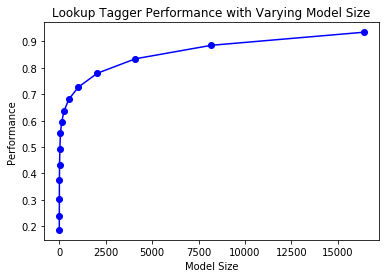

In [107]:
display()

### Evaluation

## 5.5 N-Gram Tagging

### Unigram Tagging

Unigram taggers are based on a simple statistical algorithm: for each token, assign the tag that is most likely for that particular token. For example, it will assign the tag JJ to any occurrence of the word frequent, since frequent is used as an adjective (e.g., a frequent word) more often than it is used as a verb (e.g., I frequent this cafe). A unigram tagger behaves just like a lookup tagger, except there is a more convenient technique for setting it up, called training. In the following code sample, we train a unigram tagger, use it to tag a sentence, and then evaluate:

In [108]:
from nltk.corpus import brown
import nltk

In [109]:
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

In [110]:
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [111]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

### Separating the Training and Testing Data

Now that we are training a tagger on some data, we must be careful not to test it on the same data, as we did in the previous example. A tagger that simply memorized its training data and made no attempt to construct a general model would get a perfect
score, but would be useless for tagging new text. Instead, we should split the data, training on 90% and testing on the remaining 10%:

In [112]:
size = int(len(brown_tagged_sents) * 0.9)

In [113]:
size

4160

In [114]:
train_sents = brown_tagged_sents[:size]

In [115]:
test_sents = brown_tagged_sents[size:]

In [116]:
unigram_tagger = nltk.UnigramTagger(train_sents)

In [117]:
unigram_tagger.evaluate(test_sents)

0.8121200039868434

### General N-Gram Tagging

The NgramTagger class uses a tagged training corpus to determine which part-of-speech
tag is most likely for each context. Here we see a special case of an n-gram tagger,
namely a bigram tagger. First we train it, then use it to tag untagged sentences:

In [118]:
bigram_tagger = nltk.BigramTagger(train_sents)

In [119]:
bigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [120]:
unseen_sent = brown_sents[4203]

In [121]:
bigram_tagger.tag(unseen_sent)

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

In [122]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

### Combining Taggers

One way to address the trade-off between accuracy and coverage is to use the more accurate algorithms when we can, but to fall back on algorithms with wider coverage when necessary. For example, we could combine the results of a bigram tagger, a unigram tagger, and a default tagger, as follows:
        
        1. Try tagging the token with the bigram tagger.
        2. If the bigram tagger is unable to find a tag for the token, try the unigram tagger.
        3. If the unigram tagger is also unable to find a tag, use a default tagger.
Most NLTK taggers permit a backoff tagger to be specified. The backoff tagger may itself have a backoff tagger:

In [123]:
t0 = nltk.DefaultTagger('NN')

In [124]:
t1 = nltk.UnigramTagger(train_sents, backoff=t0)

In [125]:
t2 = nltk.BigramTagger(train_sents, backoff=t1)

In [126]:
t2.evaluate(test_sents)

0.8452108043456593

In [ ]:
# Small Test: 
# Extend the preceding example by defining a TrigramTag ger called t3, which backs off to t2.

In [127]:
t3 = nltk.TrigramTagger(train_sents, backoff=t2)

In [128]:
t3.evaluate(test_sents)

0.843317053722715

### Tagging Unknown Words

### Storing Taggers

Training a tagger on a large corpus may take a significant time. Instead of training a tagger every time we need one, it is convenient to save a trained tagger in a file for later reuse.

In [145]:
import joblib

joblib.dump(t2, 't22.pkl')
tagger = joblib.load('t22.pkl')

In [146]:
from pickle import dump
output = open('t21.pkl','wb')
dump(t2,output,-1)
output.close()

In [147]:
from pickle import load
input = open('t2.pkl','rb')
tagger = load(input)
input.close()

In [148]:
text = """The board's action shows what free enterprise
            is up against in our complex maze of regulatory laws ."""

In [149]:
tokens = text.split()

In [150]:
tagger.tag(tokens)

[('The', 'AT'),
 ("board's", 'NN$'),
 ('action', 'NN'),
 ('shows', 'NNS'),
 ('what', 'WDT'),
 ('free', 'JJ'),
 ('enterprise', 'NN'),
 ('is', 'BEZ'),
 ('up', 'RP'),
 ('against', 'IN'),
 ('in', 'IN'),
 ('our', 'PP$'),
 ('complex', 'JJ'),
 ('maze', 'NN'),
 ('of', 'IN'),
 ('regulatory', 'NN'),
 ('laws', 'NNS'),
 ('.', '.')]

### Performance Limitations

In [151]:
cfd = nltk.ConditionalFreqDist(
    ((x[1], y[1], z[0]), z[1])
    for sent in brown_tagged_sents
    for x, y, z in nltk.trigrams(sent)
)

In [152]:
ambiguous_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1]

In [153]:
sum(cfd[c].N() for c in ambiguous_contexts) / cfd.N()

0.049297702068029296

In [154]:
test_tags = [tag for sent in brown.sents(categories='editorial')
             for (word, tag) in t2.tag(sent)]

In [155]:
gold_tags = [tag for (word, tag) in brown.tagged_words(categories='editorial')]

In [159]:
cm = nltk.ConfusionMatrix(gold_tags, test_tags)

In [166]:
cm['NN', 'NN'], cm['NN', 'NN$']

(7317, 0)

### Tagging Across Sentence Boundaries

An n-gram tagger uses recent tags to guide the choice of tag for the current word. When tagging the first word of a sentence, a trigram tagger will be using the part-of-speech tag of the previous two tokens, which will normally be the last word of the previous
sentence and the sentence-ending punctuation. However, the lexical category that closed the previous sentence has no bearing on the one that begins the next sentence.

In [167]:
# N-gram tagging at the sentence level.
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

In [168]:
size = int(len(brown_tagged_sents) * 0.9)

In [169]:
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]

In [170]:
t0 = nltk.DefaultTagger('NN')

In [171]:
t1 = nltk.UnigramTagger(train_sents, backoff=t0)

In [172]:
t2 = nltk.BigramTagger(train_sents, backoff=t1)

In [173]:
t2.evaluate(test_sents)

0.8452108043456593

## 5.6 Transformation-Based Tagging

In [2]:
from nltk.tbl import demo as brill_demo

In [3]:
brill_demo.demo()

Loading tagged data from treebank... 
Read testing data (200 sents/5251 wds)
Read training data (800 sents/19933 wds)
Read baseline data (800 sents/19933 wds) [reused the training set]
Trained baseline tagger
    Accuracy on test set: 0.8366
Training tbl tagger...
TBL train (fast) (seqs: 800; tokens: 19933; tpls: 24; min score: 3; min acc: None)
Finding initial useful rules...
    Found 12799 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  23  23   0   0  | POS->VBZ if Pos:PRP@[-2,-1]
  18  19   1   0  | NN->VB if Pos:-NONE-@[-2] & Pos:TO@[-1]
  14  14   0   0  | VBP->VB if Pos:MD@[-2,-1]
  12  12   0   0  | VBP->VB if Pos:TO@[-1]
  

## 5.7 How to Determine the Category of a Word

### Morphological Clues

### Syntactic Clues

### Semantic Clues

### New Words

### Morphology in Part of Speech Tagsets